In [1]:
# preload dataset automatically, if not already in place.
import os
from pathlib import Path
import numpy as np
import pandas as pd

def download_file_from_gdrive(file_url, filename, out_path: Path, overwrite=False):
    """
    Downloads a file from GDrive given an URL
    :param file_url: a string formated as https://drive.google.com/uc?id=<file_id>
    :param: the desired file name
    :param: the desired folder where the file will be downloaded to
    :param overwrite: whether to overwrite the file if it already exists
    """
    file_exists = os.path.exists(f'{out_path}/{filename}')

    if (file_exists and overwrite) or (not file_exists):
        os.system(f'gdown {file_url} -O {out_path}/{filename}')

In [2]:
FILE_URL = "https://drive.google.com/uc?id=1_lqydkMrmyNAgG4vU4wVmp6-j7tV0XI8"
FILE_NAME = "renthop_train.json.gz"
DATA_PATH = Path("../../_static/data/")

download_file_from_gdrive(file_url=FILE_URL, filename= FILE_NAME, out_path=DATA_PATH)

df = pd.read_json(DATA_PATH / FILE_NAME, compression="gzip",
                  convert_dates=['created'])

In [3]:
texts = ["i have a cat", "you have a dog", "you and i have a cat and a dog"]

vocabulary = list(
    enumerate(set([word for sentence in texts for word in sentence.split()]))
)
print("Vocabulary:", vocabulary)


def vectorize(text):
    vector = np.zeros(len(vocabulary))
    for i, word in vocabulary:
        num = 0
        for w in text:
            if w == word:
                num += 1
        if num:
            vector[i] = num
    return vector


print("Vectors:")
for sentence in texts:
    print(vectorize(sentence.split()))

Vocabulary: [(0, 'you'), (1, 'cat'), (2, 'and'), (3, 'dog'), (4, 'have'), (5, 'i'), (6, 'a')]
Vectors:
[0. 1. 0. 0. 1. 1. 1.]
[1. 0. 0. 1. 1. 0. 1.]
[1. 1. 2. 1. 1. 1. 2.]


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1, 1))
vect.fit_transform(["no i have cows", "i have no cows"]).toarray()

array([[1, 1, 1],
       [1, 1, 1]])

In [5]:
vect.vocabulary_

{'no': 2, 'have': 1, 'cows': 0}

In [6]:
vect = CountVectorizer(ngram_range=(1, 2))
vect.fit_transform(["no i have cows", "i have no cows"]).toarray()

array([[1, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0]])

In [7]:
vect.vocabulary_

{'no': 4,
 'have': 1,
 'cows': 0,
 'no have': 6,
 'have cows': 2,
 'have no': 3,
 'no cows': 5}

In [8]:
from scipy.spatial.distance import euclidean
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(3, 3), analyzer="char_wb")

n1, n2, n3, n4 = vect.fit_transform(
    ["andersen", "petersen", "petrov", "smith"]
).toarray()

euclidean(n1, n2), euclidean(n2, n3), euclidean(n3, n4)

(2.8284271247461903, 3.1622776601683795, 3.3166247903554)

In [9]:
# # Install Keras and tensorflow (https://keras.io/)
# from keras.applications.resnet50 import ResNet50, preprocess_input
# from keras.preprocessing import image
# from scipy.misc import face
# import numpy as np

# resnet_settings = {'include_top': False, 'weights': 'imagenet'}
# resnet = ResNet50(**resnet_settings)

# # What a cute raccoon!
# img = image.array_to_img(face())
# img

In [10]:
# # In real life, you may need to pay more attention to resizing
# img = img.resize((224, 224))

# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# # Need an extra dimension because model is designed to work with an array
# # of images - i.e. tensor shaped (batch_size, width, height, n_channels)

# features = resnet.predict(x)

In [11]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO

##### Just a random picture from search
img = "http://ohscurrent.org/wp-content/uploads/2015/09/domus-01-google.jpg"
img = requests.get(img)
img = Image.open(BytesIO(img.content))
text = pytesseract.image_to_string(img)

print(text)

Google



In [12]:
img = "https://habrastorage.org/webt/mj/uv/6o/mjuv6olsh1x9xxe1a6zjy79u1w8.jpeg"
img = requests.get(img)
img = Image.open(BytesIO(img.content))

print(pytesseract.image_to_string(img))

BEDROOM
16 xI2

DINING AREA
11" 100"

Livinc Room
120" 182"

KITCHEN
102" 710"

x1t0"

 



In [13]:
import reverse_geocoder as revgc

revgc.search(list(zip(df.latitude, df.longitude)))

Loading formatted geocoded file...


[{'lat': '40.74482',
  'lon': '-73.94875',
  'name': 'Long Island City',
  'admin1': 'New York',
  'admin2': 'Queens County',
  'cc': 'US'},
 {'lat': '40.74482',
  'lon': '-73.94875',
  'name': 'Long Island City',
  'admin1': 'New York',
  'admin2': 'Queens County',
  'cc': 'US'},
 {'lat': '40.74482',
  'lon': '-73.94875',
  'name': 'Long Island City',
  'admin1': 'New York',
  'admin2': 'Queens County',
  'cc': 'US'},
 {'lat': '40.74482',
  'lon': '-73.94875',
  'name': 'Long Island City',
  'admin1': 'New York',
  'admin2': 'Queens County',
  'cc': 'US'},
 {'lat': '40.74482',
  'lon': '-73.94875',
  'name': 'Long Island City',
  'admin1': 'New York',
  'admin2': 'Queens County',
  'cc': 'US'},
 {'lat': '40.71427',
  'lon': '-74.00597',
  'name': 'New York City',
  'admin1': 'New York',
  'admin2': '',
  'cc': 'US'},
 {'lat': '40.71427',
  'lon': '-74.00597',
  'name': 'New York City',
  'admin1': 'New York',
  'admin2': '',
  'cc': 'US'},
 {'lat': '40.78343',
  'lon': '-73.96625',
  

In [14]:
df['dow'] = df['created'].apply(lambda x: x.date().weekday())
df['is_weekend'] = df['created'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)

In [15]:
def make_harmonic_features(value, period=24):
    value *= 2 * np.pi / period
    return np.cos(value), np.sin(value)

In [16]:
from scipy.spatial import distance

euclidean(make_harmonic_features(23), make_harmonic_features(1))

0.5176380902050423

In [17]:
euclidean(make_harmonic_features(9), make_harmonic_features(11))

0.5176380902050414

In [18]:
euclidean(make_harmonic_features(9), make_harmonic_features(21))

2.0

In [19]:
# Install pyyaml ua-parser user-agents
import user_agents

ua = "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/56.0.2924.76 Chrome/56.0.2924.76 Safari/537.36"
ua = user_agents.parse(ua)

print("Is a bot? ", ua.is_bot)
print("Is mobile? ", ua.is_mobile)
print("Is PC? ", ua.is_pc)
print("OS Family: ", ua.os.family)
print("OS Version: ", ua.os.version)
print("Browser Family: ", ua.browser.family)
print("Browser Version: ", ua.browser.version)

Is a bot?  False
Is mobile?  False
Is PC?  True
OS Family:  Ubuntu
OS Version:  ()
Browser Family:  Chromium
Browser Version:  (56, 0, 2924)


In [20]:
import numpy as np
from scipy.stats import beta, shapiro
from sklearn.preprocessing import StandardScaler

data = beta(1, 10).rvs(1000).reshape(-1, 1)
shapiro(data)

ShapiroResult(statistic=0.8565715551376343, pvalue=3.3466493439097044e-29)

In [21]:
# Value of the statistic, p-value
shapiro(StandardScaler().fit_transform(data))

# With such p-value we'd have to reject the null hypothesis of normality of the data

ShapiroResult(statistic=0.8565717339515686, pvalue=3.346792885875872e-29)

In [22]:
data = np.array([1, 1, 0, -1, 2, 1, 2, 3, -2, 4, 100]).reshape(-1, 1).astype(np.float64)
StandardScaler().fit_transform(data)

array([[-0.31922662],
       [-0.31922662],
       [-0.35434155],
       [-0.38945648],
       [-0.28411169],
       [-0.31922662],
       [-0.28411169],
       [-0.24899676],
       [-0.42457141],
       [-0.21388184],
       [ 3.15715128]])

In [23]:
(data - data.mean()) / data.std()

array([[-0.31922662],
       [-0.31922662],
       [-0.35434155],
       [-0.38945648],
       [-0.28411169],
       [-0.31922662],
       [-0.28411169],
       [-0.24899676],
       [-0.42457141],
       [-0.21388184],
       [ 3.15715128]])

In [24]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler().fit_transform(data)

array([[0.02941176],
       [0.02941176],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.02941176],
       [0.03921569],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.        ]])

In [25]:
(data - data.min()) / (data.max() - data.min())

array([[0.02941176],
       [0.02941176],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.02941176],
       [0.03921569],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.        ]])

In [26]:
from scipy.stats import lognorm

data = lognorm(s=1).rvs(1000)
shapiro(data)

ShapiroResult(statistic=0.6674654483795166, pvalue=2.631442334217001e-40)

In [27]:
shapiro(np.log(data))

ShapiroResult(statistic=0.9980519413948059, pvalue=0.30506664514541626)

In [28]:
# Let's draw plots!
import statsmodels.api as sm

# Let's take the price feature from Renthop dataset and filter by hands the most extreme values for clarity

price = df.price[(df.price <= 20000) & (df.price > 500)]
price_log = np.log(price)

# A lot of gestures so that sklearn didn't shower us with warnings
price_mm = (
    MinMaxScaler()
    .fit_transform(price.values.reshape(-1, 1).astype(np.float64))
    .flatten()
)
price_z = (
    StandardScaler()
    .fit_transform(price.values.reshape(-1, 1).astype(np.float64))
    .flatten()
)

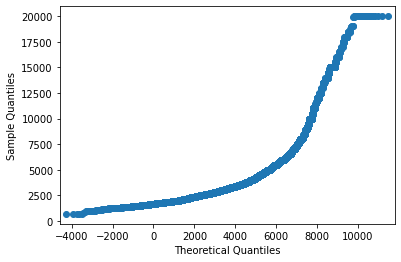

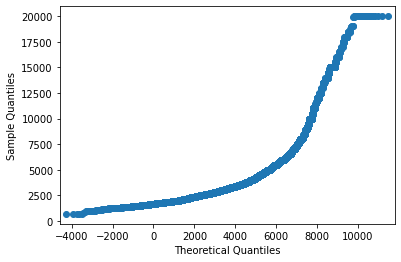

In [29]:
sm.qqplot(price, loc=price.mean(), scale=price.std())

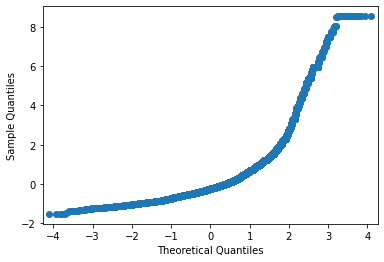

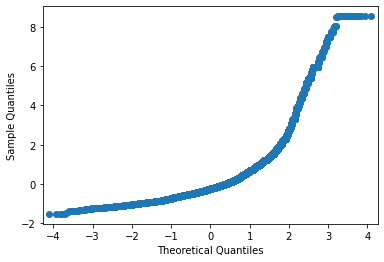

In [30]:
sm.qqplot(price_z, loc=price_z.mean(), scale=price_z.std())

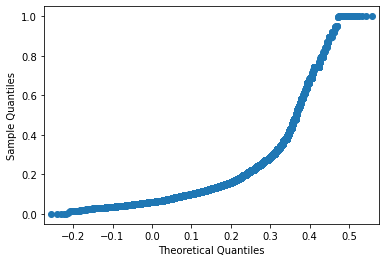

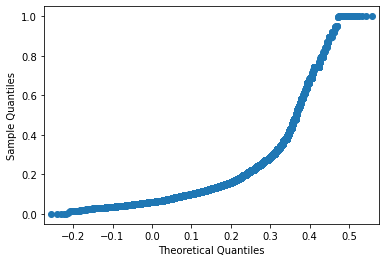

In [31]:
sm.qqplot(price_mm, loc=price_mm.mean(), scale=price_mm.std())

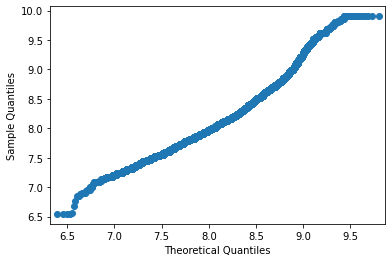

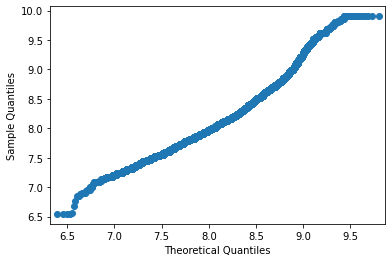

In [32]:
sm.qqplot(price_log, loc=price_log.mean(), scale=price_log.std())

In [33]:
rooms = df["bedrooms"].apply(lambda x: max(x, 0.5))
# Avoid division by zero; .5 is chosen more or less arbitrarily
df["price_per_bedroom"] = df["price"] / rooms

In [34]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import VarianceThreshold

x_data_generated, y_data_generated = make_classification()
x_data_generated.shape

(100, 20)

In [35]:
VarianceThreshold(0.7).fit_transform(x_data_generated).shape

(100, 18)

In [36]:
VarianceThreshold(0.8).fit_transform(x_data_generated).shape

(100, 18)

In [37]:
VarianceThreshold(0.9).fit_transform(x_data_generated).shape

(100, 16)

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

x_data_kbest = SelectKBest(f_classif, k=5).fit_transform(
    x_data_generated, y_data_generated
)
x_data_varth = VarianceThreshold(0.9).fit_transform(x_data_generated)

In [39]:
logit = LogisticRegression(solver="lbfgs", random_state=17)

In [40]:
cross_val_score(
    logit, x_data_generated, y_data_generated, scoring="neg_log_loss", cv=5
).mean()

-0.31323244927703203

In [41]:
cross_val_score(
    logit, x_data_kbest, y_data_generated, scoring="neg_log_loss", cv=5
).mean()

-0.2646461322990953

In [42]:
cross_val_score(
    logit, x_data_varth, y_data_generated, scoring="neg_log_loss", cv=5
).mean()

-0.29360120082494295

In [43]:
# Synthetic example

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

x_data_generated, y_data_generated = make_classification()

rf = RandomForestClassifier(n_estimators=10, random_state=17)
pipe = make_pipeline(SelectFromModel(estimator=rf), logit)

print(
    cross_val_score(
        logit, x_data_generated, y_data_generated, scoring="neg_log_loss", cv=5
    ).mean()
)
print(
    cross_val_score(
        rf, x_data_generated, y_data_generated, scoring="neg_log_loss", cv=5
    ).mean()
)
print(
    cross_val_score(
        pipe, x_data_generated, y_data_generated, scoring="neg_log_loss", cv=5
    ).mean()
)

-0.36538470229329534
-0.6560283561618099
-0.3128548340438924


In [44]:
# x_data, y_data = get_data()
x_data = x_data_generated
y_data = y_data_generated

pipe1 = make_pipeline(StandardScaler(), SelectFromModel(estimator=rf), logit)

pipe2 = make_pipeline(StandardScaler(), logit)

print(
    "LR + selection: ",
    cross_val_score(pipe1, x_data, y_data, scoring="neg_log_loss", cv=5).mean(),
)
print(
    "LR: ", cross_val_score(pipe2, x_data, y_data, scoring="neg_log_loss", cv=5).mean()
)
print("RF: ", cross_val_score(rf, x_data, y_data, scoring="neg_log_loss", cv=5).mean())

LR + selection:  -0.31033863169931875
LR:  -0.3616022804763758
RF:  -0.6560283561618099


In [45]:
# # Install mlxtend
# from mlxtend.feature_selection import SequentialFeatureSelector

# selector = SequentialFeatureSelector(
#     logit, scoring="neg_log_loss", verbose=2, k_features=3, forward=False, n_jobs=-1
# )

# selector.fit(x_data, y_data)